(1112, 1922)


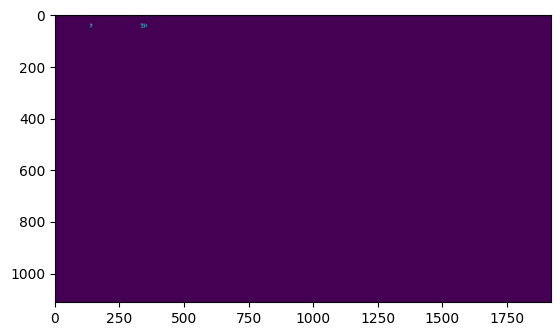

In [1]:
import numpy as np
import plotly as plt
import matplotlib.pyplot as pyplot
from matplotlib.image import imread
import openexr_numpy

analyticTIRrender = imread('analyticapproxD1.png')
noanalyticTIRrender = imread('noanalyticapproxd2.png')

diff = np.abs(np.average(analyticTIRrender,axis=2) - np.average(noanalyticTIRrender,axis=2))
print(diff.shape)
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
ax.imshow(diff)

(1024, 1024, 3)
[0.41796875 0.41796875 0.4140625 ] [0.41960004 0.41960004 0.41960004] 0.0029333532


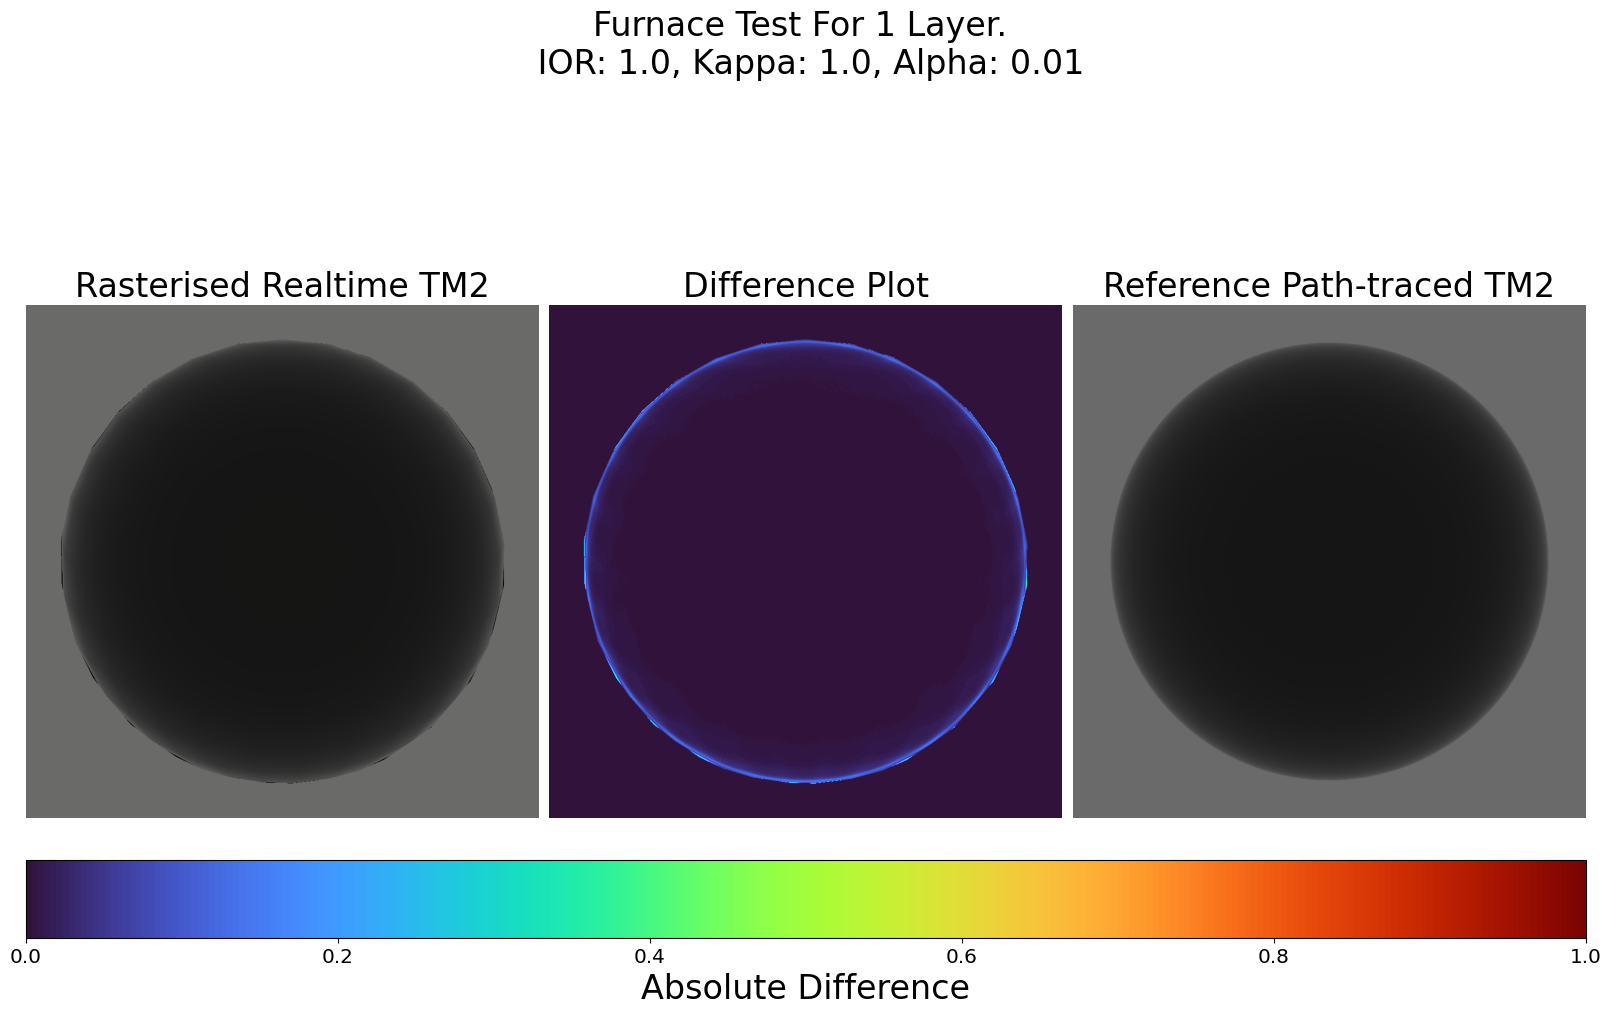

In [3]:
def crop_center(img, cropx, cropy):
    y,x,c = img.shape
    startx = x//2 - cropx//2
    starty = y//2 - cropy//2
    return img[starty:starty+cropy, startx:startx+cropx, :]

def adjust_gamma(image: np.ndarray, gamma=1.0):
    igamma = 1.0/gamma
    imin, imax = image.min(), image.max()

    img_c = image.copy()
    img_c = ((img_c - imin) / (imax - imin)) ** igamma
    img_c = img_c * (imax - imin) + imin

    return img_c

twolayers = openexr_numpy.imread('energyleakage/onelayerraster.exr')
reference = openexr_numpy.imread('energyleakage/onelayerfurnace.exr')

twolayers = twolayers.astype(np.float32)

#reference = adjust_gamma(reference, 2)

twolayers = crop_center(twolayers, 1024, 1024)


twolayers = twolayers[:,:,:3] #drop the alpha channel
print(twolayers.shape)
#realtime = adjust_gamma(realtime, 0.13)

diff = np.abs(np.average(twolayers, axis=2) - np.average(reference, axis=2))

print(twolayers[5][0], reference[5][0], diff[1][0])

FONTSIZE = 24

fig = pyplot.figure(layout='constrained', figsize=(16,10))
fig.suptitle("Furnace Test For 1 Layer. \n IOR: 1.0, Kappa: 1.0, Alpha: 0.01", fontsize=FONTSIZE)

axtop = fig.subplots(nrows=1, ncols=3)
axtop[0].imshow(twolayers)
axtop[0].set_title("Rasterised Realtime TM2", fontsize=FONTSIZE)
axtop[2].imshow(reference,)
axtop[2].set_title("Reference Path-traced TM2", fontsize=FONTSIZE)

axtop[0].set_axis_off()
axtop[2].set_axis_off()

deltaplot = axtop[1]
deltaplot.set_title("Difference Plot", fontsize=FONTSIZE)


deltaplot.set_axis_off()
diffplot = deltaplot.imshow(diff, cmap='turbo', vmin=0, vmax=1)


col = fig.colorbar(diffplot, ax=axtop, orientation='horizontal', )
col.set_label(label="Absolute Difference", fontsize=FONTSIZE)
col.ax.tick_params(labelsize='x-large')





(1024, 1024, 3)
Average Difference 0.033053026
[0.41796875 0.41796875 0.4140625 ] [0.41959992 0.41959992 0.41959992] 0.0029337406


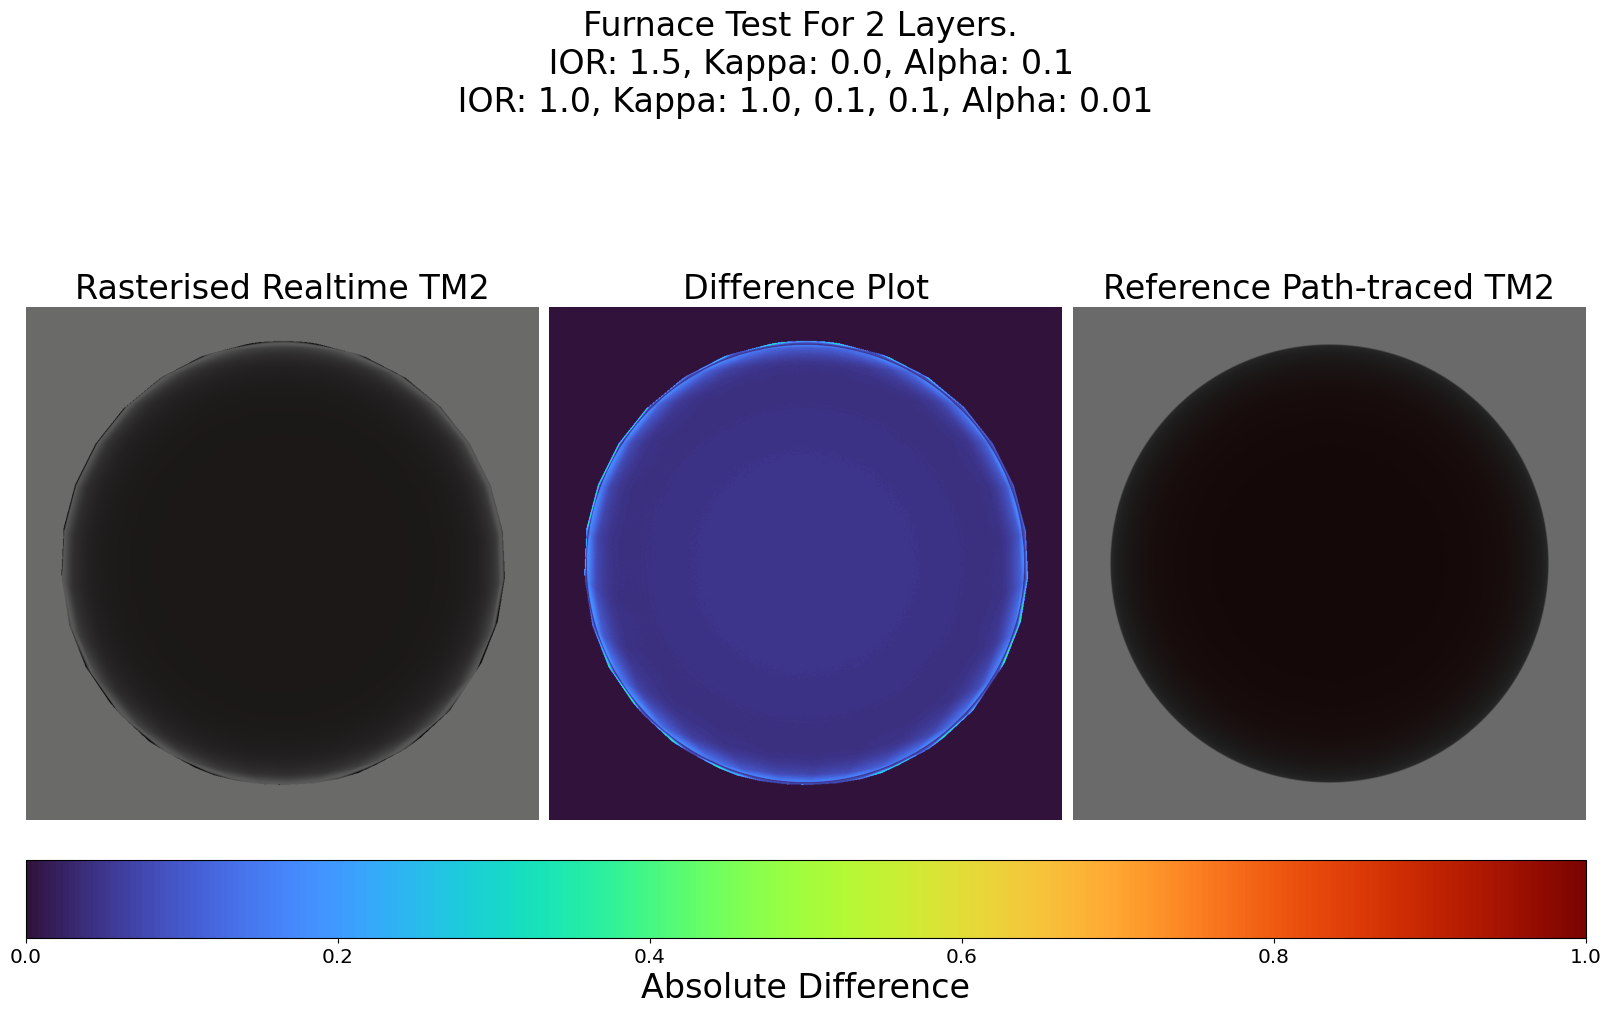

In [4]:
def crop_center(img, cropx, cropy):
    y,x,c = img.shape
    startx = x//2 - cropx//2
    starty = y//2 - cropy//2
    return img[starty:starty+cropy, startx:startx+cropx, :]

def adjust_gamma(image: np.ndarray, gamma=1.0):
    igamma = 1.0/gamma
    imin, imax = image.min(), image.max()

    img_c = image.copy()
    img_c = ((img_c - imin) / (imax - imin)) ** igamma
    img_c = img_c * (imax - imin) + imin

    return img_c

realtime = openexr_numpy.imread('energyleakage/2layerfurnacenewFGD.exr')
reference = openexr_numpy.imread('energyleakage/twolayerfurnaceref.exr')

realtime = realtime.astype(np.float32)

#reference = adjust_gamma(reference, 2)

realtime = crop_center(realtime, 1024, 1024)


realtime = realtime[:,:,:3] #drop the alpha channel
print(realtime.shape)
#realtime = adjust_gamma(realtime, 0.13)

diff = np.abs(np.average(realtime, axis=2) - np.average(reference, axis=2))


print("Average Difference", np.average(diff))
print(realtime[5][0], reference[5][0], diff[1][0])

FONTSIZE = 24

fig = pyplot.figure(layout='constrained', figsize=(16,10))
fig.suptitle("Furnace Test For 2 Layers. \n \
IOR: 1.5, Kappa: 0.0, Alpha: 0.1\n IOR: 1.0, Kappa: 1.0, 0.1, 0.1, Alpha: 0.01 ", fontsize=FONTSIZE)

axtop = fig.subplots(nrows=1, ncols=3)
axtop[0].imshow(realtime)
axtop[0].set_title("Rasterised Realtime TM2", fontsize=FONTSIZE)
axtop[2].imshow(reference,)
axtop[2].set_title("Reference Path-traced TM2", fontsize=FONTSIZE)

axtop[0].set_axis_off()
axtop[2].set_axis_off()

deltaplot = axtop[1]
deltaplot.set_title("Difference Plot", fontsize=FONTSIZE)


deltaplot.set_axis_off()
diffplot = deltaplot.imshow(diff, cmap='turbo', vmin=0, vmax=1)


col = fig.colorbar(diffplot, ax=axtop, orientation='horizontal', )
col.set_label(label="Absolute Difference", fontsize=FONTSIZE)
col.ax.tick_params(labelsize='x-large')





(1024, 1024, 3)
Two Layer Average Energy: 0.15897764
Three Layer Average Energy: 0.15897764
This is 1.0x greater than the two layer average.
Four layer average energy: 0.14972988
This is 1.061763048171997x greater than the 3 layer average.


Text(0.4, 0.2, 'Incident energy: 0.42')

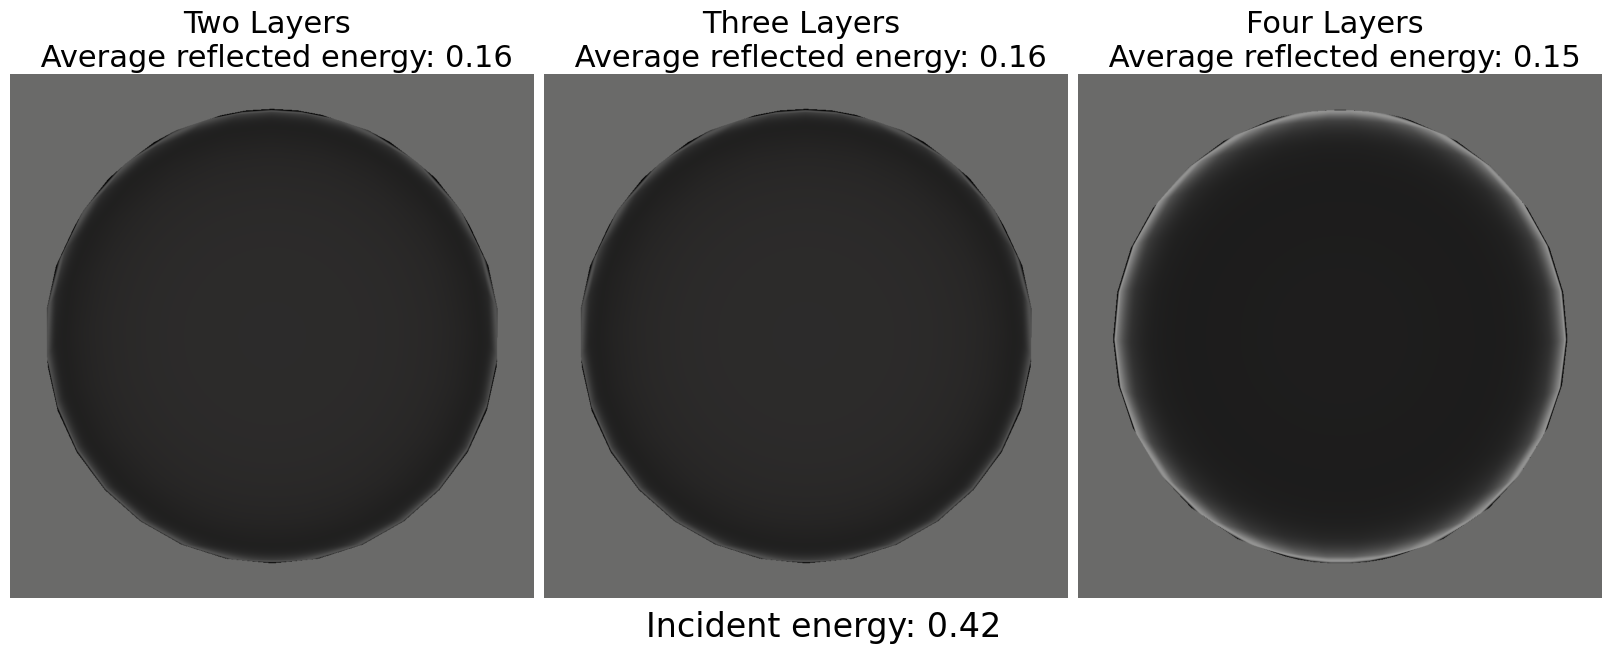

In [5]:
twolayers = openexr_numpy.imread('energyleakage/3layerfurnacenewFGD.exr')
threelayers = openexr_numpy.imread('energyleakage/3layerfurnacenewFGD.exr')
fourlayers = openexr_numpy.imread('energyleakage/4layerfurnacenewFGD.exr')
reference = openexr_numpy.imread('energyleakage/twolayerfurnaceref.exr')

twolayers = twolayers.astype(np.float32)

#reference = adjust_gamma(reference, 2)
DIM = (1024, 1024)

twolayers = crop_center(twolayers, *DIM)
threelayers =crop_center(threelayers, *DIM)
fourlayers = crop_center(fourlayers, *DIM)

#mask out just the sphere for calculating average energy.
mask = reference < 0.4
backdrop = reference[0,0]


twolayers = twolayers.astype(np.float32)
twolayers = twolayers[:,:,:3] #drop the alpha channel

threelayers = threelayers.astype(np.float32)
threelayers = threelayers[:,:,:3]

fourlayers = fourlayers.astype(np.float32)
fourlayers = fourlayers[:,:,:3]

print(twolayers.shape)

# maskplot = pyplot.figure(1)
# ax = maskplot.subplots(1,1)

# mask = np.where(mask, 255, 0)
# ax.imshow(mask)

twolayeravg = np.average(twolayers[mask])
threelayeravg = np.average(threelayers[mask])
fourlayeravg = np.average(fourlayers[mask])

print("Two Layer Average Energy:",twolayeravg)
print("Three Layer Average Energy:", threelayeravg)
print(f"This is {twolayeravg / threelayeravg}x greater than the two layer average.")

print("Four layer average energy:", fourlayeravg)
print(f"This is {threelayeravg / fourlayeravg}x greater than the 3 layer average.")

overemission = pyplot.figure(1, layout='constrained', figsize=(16,10))
axes = overemission.subplots(1,3)

axes[0].imshow(twolayers)
axes[0].set_title(f"Two Layers \n Average reflected energy: {twolayeravg:.2f}", fontsize=FONTSIZE-2)
axes[0].set_axis_off()
axes[1].imshow(threelayers)
axes[1].set_title(f"Three Layers \n Average reflected energy: {threelayeravg:.2f}", fontsize=FONTSIZE-2)
axes[1].set_axis_off()
axes[2].imshow(fourlayers)
axes[2].set_title(f"Four Layers \n Average reflected energy: {fourlayeravg:.2f}", fontsize=FONTSIZE-2)
axes[2].set_axis_off()

pyplot.figtext(0.4, 0.2, f"Incident energy: {np.average(backdrop):.2f}", fontsize=FONTSIZE)